Statistics of Description Dataset
==================

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as pltColors
import numpy as np
import csv
from collections import Counter, defaultdict

In [3]:
# Load files
inputFile = 'data/cat_desc_wn.csv'
headers = None
data = Counter()
with open(inputFile) as fin:
    r = csv.reader(fin)
    for row in r:
        if headers is None:
            headers = row
            print headers
        else:
            data[tuple(row[:-1])] += int(row[-1])

catNameFile = 'data/categoryKey.csv'
catName = {}
with open(catNameFile) as fin:
    r = csv.reader(fin)
    for row in r:
        catName[row[0]] = row[1]

['category_id', 'description', 'count']


In [6]:
# Count various frequencys
wordList = []
descOccur = Counter()
descCat = Counter()
catOccur = Counter()
catUniqueWord = Counter()
for (c, d), v in data.iteritems():
    wordList.append(d)
    descOccur[d]+=v
    descCat[d] += 1
    catOccur[c] += v
    catUniqueWord[c] += 1
print 'Number of valid answers:', sum(catOccur.values())
print 'Number of distinct descriptions:', len(wordList)
print 'Number of categories:', len(catOccur.keys())
print sum(v for k, v in descOccur.iteritems() if len(k.split(' ')) == 1 and v >= 100)
print sum(v for k, v in descOccur.iteritems() if len(k.split(' ')) == 2 and v >= 100)
print sum(v for k, v in descOccur.iteritems() if len(k.split(' ')) == 3 and v >= 100)
print sum(v for k, v in descOccur.iteritems() if len(k.split(' ')) == 4 and v >= 100)
print sum(v for k, v in descOccur.iteritems() if len(k.split(' ')) == 5 and v >= 100)

Number of valid answers: 5115137
Number of distinct descriptions: 468078
Number of categories: 1055
4072518
721279
6898
401
0


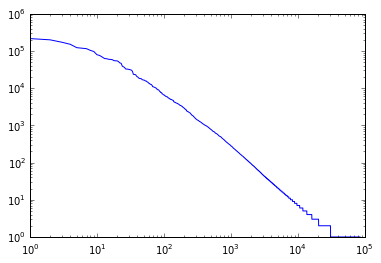

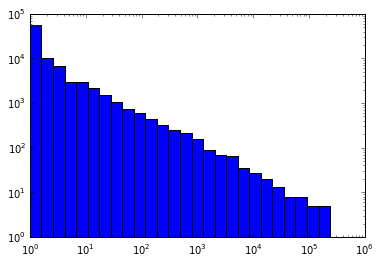

house 228983
building 214988
factory 199000
mountain 171521
hall 150940
shop 122592
church 118035
forest 115086
garden 103446
road 96550
sea 79436
restaurant 75395
office 68800
room 62542
bridge 61770
ground 59648
river 59191
water 58199
bedroom 54872
palace 54275


In [20]:
# log rank - log #occurance, for distinct descriptions
pltData = [v for k, v in descOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #occurance, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 6.0, 30))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for d, c in descOccur.most_common(20):
    print d, c

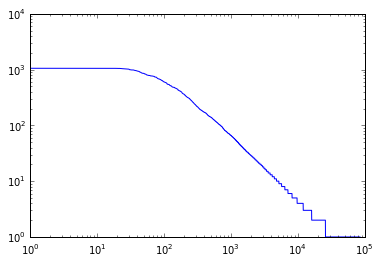

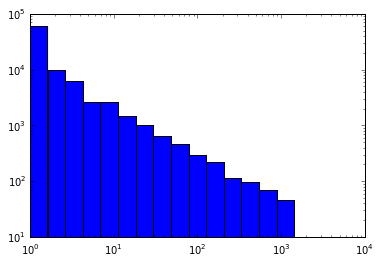

bridge 1055
garden 1055
hall 1055
road 1055
house 1055
church 1055
play ground 1055
shop 1055
forest 1055
bedroom 1055
office 1055
building 1055
mountain 1055
factory 1055
sea 1054
ground 1054
restaurant 1053
river 1053
fort 1052
tree 1051
room 1048
park 1048
hotel 1048
palace 1041
home 1037
water 1034
car 1030
people 1026
stadium 1021
living room 1016


In [5]:
# log rank - log #category, for distinct descriptions
pltData = [v for k, v in descCat.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# histogram of log #category, for distinct descriptions
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, bins=np.logspace(0.0, 4.0, 20))
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

for w, c in descCat.most_common(30):
    print w, c

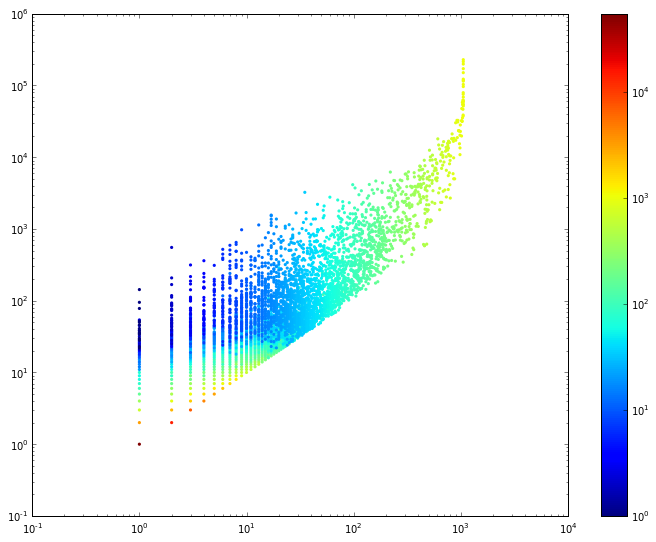

In [6]:
# log #category - log #occurance - (color) log frequency, for distinct descriptions
pltData1 = [descCat[w] for w in wordList]
pltData2 = [descOccur[w] for w in wordList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
# pltColor = np.log10(pltColor)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='', norm=pltColors.LogNorm())
cbar = fig.colorbar(scat, ax=ax)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

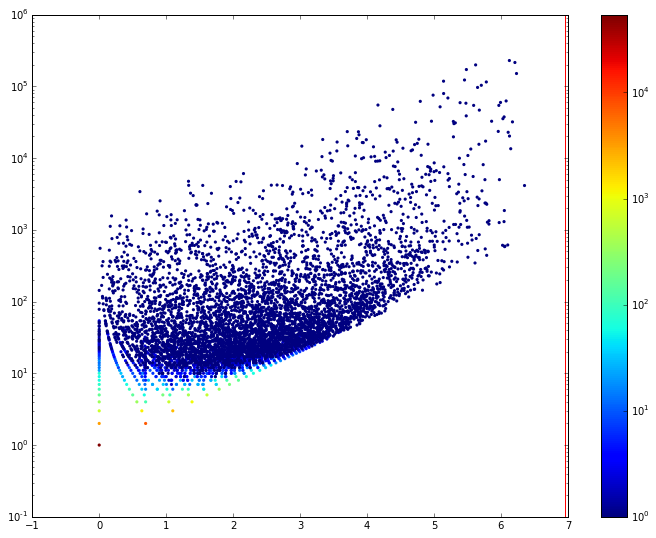

Theoretical upper bound: 6.96129604591
Most diverse descriptions: (description, entropy, #occuranceP)
place 6.35168401771 4144
hall 6.23208868701 150940
building 6.20821391799 214988
people 6.17166355614 31956
man 6.14566213873 13497
wall 6.12742942097 20273
house 6.12548872063 228983
company 6.10748643267 22878
laser show 6.1011483597 615
room 6.07707765193 62542
body art 6.05968463481 592
shop board 6.0542162433 583
person 6.05039606164 1857
tree 6.0469312839 37494
outside 6.04588046055 1302
home 6.02867229753 35389
diagnostic lab 6.02384684614 609
ground 5.99307607498 59648
grassland 5.97667309984 5006
open place 5.97333632797 1262


In [15]:
# entropy of category distribution - log #occurance, for each description
descEntropy = {}
desc_cat_cnt = defaultdict(Counter)
for (cat, desc), cnt in data.iteritems():
    desc_cat_cnt[desc][cat]+=cnt
pltData = []
topEntropy = []
from scipy.stats import entropy
from sklearn.preprocessing import normalize
for desc, cntr in desc_cat_cnt.iteritems():
    occ = sum(cntr.values())
    dist = np.array(cntr.values(), dtype='float') / occ
    ent = entropy(dist)
    descEntropy[desc] = ent
    pltData.append((ent, occ))
    topEntropy.append((ent, desc, occ))
pltDensity = Counter(pltData)
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
# pltColor = np.log10(pltColor)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='', norm=pltColors.LogNorm())
cbar = fig.colorbar(scat, ax=ax)
ax.set_yscale('log')
ax.axvline(x=np.log(len(catOccur.keys())), color='r')
plt.show()

print 'Theoretical upper bound:', np.log(len(catOccur.keys()))
print 'Most diverse descriptions: (description, entropy, #occuranceP)'
topEntropy.sort(key=lambda (e, d, o): e, reverse=True)
for e, d, o in topEntropy[:20]:
    print d, e, o

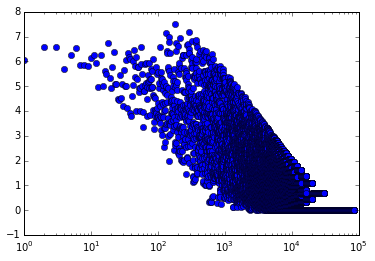

In [18]:
# log rank - (log #occurance - entropy), for distinct descriptions
from math import log
pltData = [log(v) - descEntropy[k] for k, v in descOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line, = ax.plot(pltData, 'o')
ax.set_xscale('log')
plt.show()
pltData = []

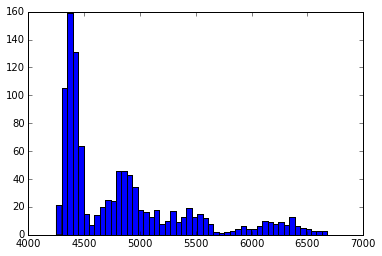

In [8]:
# histogram of #occurance, for each category
pltData = [v for k, v in catOccur.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

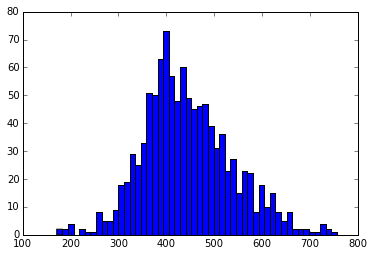

In [9]:
# histogram of #(unique descriptions), for each category
pltData = [v for k, v in catUniqueWord.most_common()]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
n, bins, patches = ax.hist(pltData, 50)
plt.show()

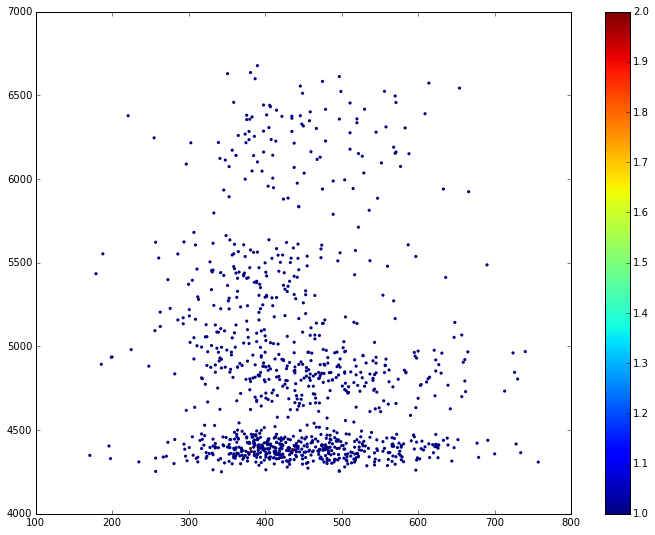

In [10]:
# #(unique descriptions) - #occurance - (color) log frequency, for each category
catList = list(catOccur.keys())
pltData1 = [catUniqueWord[c] for c in catList]
pltData2 = [catOccur[c] for c in catList]
pltDensity = Counter(zip(pltData1, pltData2))
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='')
cbar = fig.colorbar(scat, ax=ax)
plt.show()

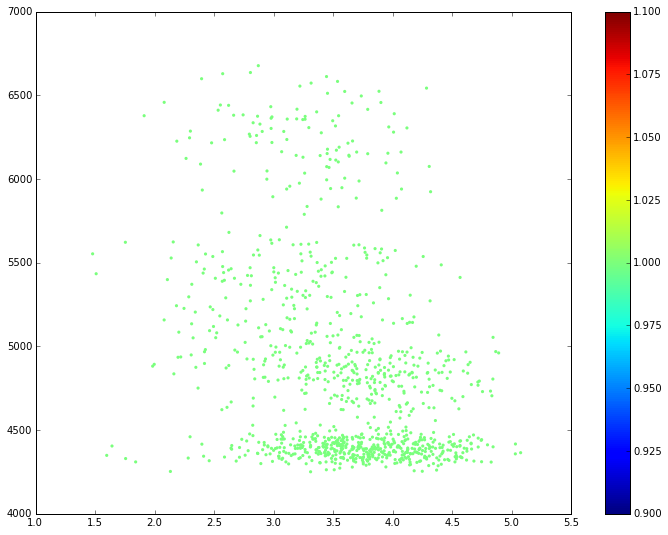

Least diverse categories: (name, id, entropy, #occurance)
hotel room 478 1.47977190916 5553
motel room 617 1.50946178342 5434
suvic 920 1.59813986966 4349
master bedroom 588 1.64250539231 4405
forest 390 1.75491303055 5622
guest room 436 1.75696099193 4330
bed sitting room 103 1.84117285038 4310
cataract 191 1.91254287409 6378
woodland 1045 1.98418966981 4882
waterfall (cataract) 1028 1.99732958313 4893

Most diverse categories: (name, id, entropy, #occurance)
booth 129 4.82780035059 4309
drinking fountain 320 4.83376058095 4705
community center 245 4.8420804343 4805
archaological excavation 38 4.84353672705 5054
skating rink 855 4.84373411697 4400
africa 5 4.86605142366 4969
agriculture 7 4.89070449783 4961
rubble 810 5.03092819894 4358
outdoor 668 5.03174984007 4417
borstal 130 5.07530273476 4365


In [11]:
# entropy of description distribution - log #occurance, for each category
cat_desc_cnt = defaultdict(Counter)
for (cat, desc), cnt in data.iteritems():
    cat_desc_cnt[cat][desc]+=cnt
pltData = []
topEntropy = []
from scipy.stats import entropy
from sklearn.preprocessing import normalize
for cat, cntr in cat_desc_cnt.iteritems():
    occ = sum(cntr.values())
    dist = np.array(cntr.values(), dtype='float') / occ
    ent = entropy(dist)
    pltData.append((ent, occ))
    topEntropy.append((ent, cat, occ))
pltDensity = Counter(pltData)
pltData = [(x, y, z) for (x, y), z in pltDensity.most_common()]
pltX, pltY, pltColor = zip(*pltData)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(1,1,1)
scat = ax.scatter(pltX, pltY, c=pltColor, s=10, edgecolor='')
cbar = fig.colorbar(scat, ax=ax)
plt.show()

topEntropy.sort(key=lambda (e, c, o): e)
print 'Least diverse categories: (name, id, entropy, #occurance)'
for e, c, o in topEntropy[:10]:
    print catName[c], c, e, o
print
print 'Most diverse categories: (name, id, entropy, #occurance)'
for e, c, o in topEntropy[-10:]:
    print catName[c], c, e, o